In [1]:
from fastcore.xtras import load_pickle
import pandas as pd 
import os 
from glob import glob
from pathlib import Path
from scipy.stats import sem
import matplotlib.pyplot as plt
from datetime import datetime

import sys
sys.path.append("/home/jorenvanherck/Documents/gptchallengeV2/gptchem-gptj/plotutils/")
from plotutils import *

plt.style.use("/home/jorenvanherck/Documents/gptchallengeV2/gptchem-gptj/plotutils/kevin.mplstyle")

FOLDER = 'out'

In [2]:
if not os.path.exists(FOLDER):
    raise FileExistsError('Cannot find folder {}'.format(FOLDER))

all_res = glob(f'{FOLDER}/*.pkl')
print('Pickles found in {}: {}'.format(FOLDER, len(all_res)))

Pickles found in out: 30


In [3]:

compiled_res_list = []
conf_mats = []

for results in all_res:
    res_full = load_pickle(results)
    res = res_full['results']
    summary = {
        'size': res_full['train_size'],
        #'representation': res_full['data_summary']['representation'],
        'target': res_full['data_summary']['target'],
        'accuracy': res['accuracy'],
        'f1_macro': res['f1_macro'],
        'f1_micro': res['f1_micro'],
        'kappa': res['kappa'],
        'num_epochs': res_full['config']['tune_settings']['num_train_epochs'],
        'lr': res_full['config']['tune_settings']['learning_rate'],
        'bins': len(set(res['all_y_true'])),
        'test_size': len(res['all_y_true'])
       
    }
    confusion_matrix = {
        'all_y_true':res['all_y_true'],
        'all_y_pred':res['all_y_pred']
    }
    conf_mats.append(confusion_matrix)
    compiled_res_list.append(summary)
print(compiled_res_list)

[{'size': 50, 'target': 'deltaG4_bin', 'accuracy': 0.58, 'f1_macro': 0.4900437105390966, 'f1_micro': 0.58, 'kappa': 0.15999999999999992, 'num_epochs': 15, 'lr': 0.0003, 'bins': 2, 'test_size': 50}, {'size': 1000, 'target': 'deltaG4_bin', 'accuracy': 0.9, 'f1_macro': 0.8996386993175431, 'f1_micro': 0.9, 'kappa': 0.8, 'num_epochs': 15, 'lr': 0.0003, 'bins': 2, 'test_size': 50}, {'size': 100, 'target': 'deltaG4_bin', 'accuracy': 0.88, 'f1_macro': 0.8798076923076923, 'f1_micro': 0.88, 'kappa': 0.76, 'num_epochs': 20, 'lr': 0.0003, 'bins': 2, 'test_size': 50}, {'size': 10, 'target': 'deltaG4_bin', 'accuracy': 0.0, 'f1_macro': 0.0, 'f1_micro': 0.0, 'kappa': 0.0, 'num_epochs': 20, 'lr': 0.0003, 'bins': 2, 'test_size': 50}, {'size': 50, 'target': 'deltaG4_bin', 'accuracy': 0.66, 'f1_macro': 0.6155585707824514, 'f1_micro': 0.66, 'kappa': 0.32000000000000006, 'num_epochs': 20, 'lr': 0.0003, 'bins': 2, 'test_size': 50}, {'size': 1000, 'target': 'deltaG4_bin', 'accuracy': 0.86, 'f1_macro': 0.85949

In [4]:
compiled_res = pd.DataFrame(compiled_res_list)
grouped_res =compiled_res.groupby(['bins', 'num_epochs', 'target', 'size']).agg(['mean', 'sem'])


In [5]:
grouped_res


accuracy            f1_macro            \
                                      mean       sem      mean       sem   
bins num_epochs target      size                                           
2    15         deltaG4_bin 10    0.000000  0.000000  0.000000  0.000000   
                            50    0.686667  0.127192  0.615520  0.163610   
                            100   0.846667  0.017638  0.845717  0.017874   
                            500   0.873333  0.017638  0.873062  0.017581   
                            1000  0.900000  0.023094  0.899639  0.023177   
     20         deltaG4_bin 10    0.000000  0.000000  0.000000  0.000000   
                            50    0.813333  0.076884  0.798335  0.091567   
                            100   0.873333  0.040552  0.871510  0.042129   
                            500   0.886667  0.037118  0.886304  0.037342   
                            1000  0.880000  0.030551  0.879727  0.030731   

                                  f1_micro               kappa            \
                                      mean       sem      mean       sem   
bins num_epochs target      size                                           
2    15         deltaG4_bin 10    0.000000  0.000000  0.000000  0.000000   
                            50    0.686667  0.127192  0.373333  0.254384   
                            100   0.846667  0.017638  0.693333  0.035277   
                            500   0.873333  0.017638  0.746667  0.035277   
                            1000  0.900000  0.023094  0.800000  0.046188   
     20         deltaG4_bin 10    0.000000  0.000000  0.000000  0.000000   
                            50    0.813333  0.076884  0.626667  0.153768   
                            100   0.873333  0.040552  0.746667  0.081104   
                            500   0.886667  0.037118  0.773333  0.074237   
                            1000  0.880000  0.030551  0.760000  0.061101   

                                      lr      test_size       
                                    mean  sem      mean  sem  
bins num_epochs target      size                              
2    15         deltaG4_bin 10    0.0003  0.0      50.0  0.0  
                            50    0.0003  0.0      50.0  0.0  
                            100   0.0003  0.0      50.0  0.0  
                            500   0.0003  0.0      50.0  0.0  
                            1000  0.0003  0.0      50.0  0.0  
     20         deltaG4_bin 10    0.0003  0.0      50.0  0.0  
                            50    0.0003  0.0      50.0  0.0  
                            100   0.0003  0.0      50.0  0.0  
                            500   0.0003  0.0      50.0  0.0  
                            1000  0.0003  0.0      50.0  0.0

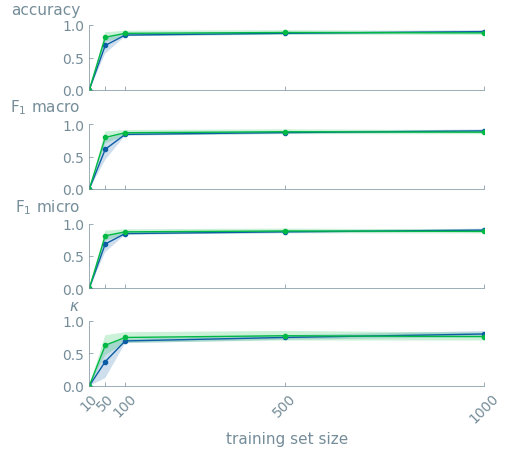

In [8]:
from scipy.stats import sem
from scipy.constants import golden
ONE_COL_WIDTH_INCH = 5
TWO_COL_WIDTH_INCH = 7.2

ONE_COL_GOLDEN_RATIO_HEIGHT_INCH = ONE_COL_WIDTH_INCH / golden
TWO_COL_GOLDEN_RATIO_HEIGHT_INCH = TWO_COL_WIDTH_INCH / golden

BINS = 2
REPRESENTATION = 'deltaG4_bin'

fig, ax = plt.subplots(4, 1,figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH),constrained_layout = True , sharex=True)
 
for num_epochs in [15,20]:
    for i, metric in enumerate(['accuracy', 'f1_macro', 'f1_micro', 'kappa']):
        ax[i].plot(
            grouped_res.loc[BINS, num_epochs,REPRESENTATION].index, 
            grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['mean'],
            marker='o',
            label=f'{num_epochs} epochs'
        )
        ax[i].fill_between(
            grouped_res.loc[BINS, num_epochs,REPRESENTATION].index,
            grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['mean'] - grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['sem'],
            grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['mean'] + grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['sem'],
            alpha=0.2
        )
        ax[i].set_ylim(0,1)
        #ax[i].set_title(metric)
        ax[i].set_xticks((list(compiled_res['size'].unique())))
        ax[i].set_xticklabels((list(compiled_res['size'].unique())), rotation = 45)
        
    ylabel_top('accuracy', ax=ax[0])
    ylabel_top(r'F$_1$ macro', ax=ax[1])
    ylabel_top(r'F$_1$ micro', ax=ax[2])
    ylabel_top(r'$\kappa$', ax=ax[3])
ax[-1].set_xlabel('training set size')


#matplotx.line_labels(ax[0])
now = datetime.now().strftime('%Y%m%d_%H%M') 
#fig.suptitle('Hydrides - {} - {}'.format(REPRESENTATION, 'binary'), fontsize=16)
fig.savefig(f'{now}_deltaG-{REPRESENTATION}-binary-{BINS}bin-classification-results.pdf', bbox_inches='tight')